# This is a model of SBIN stocks

In [55]:
url="https://raw.githubusercontent.com/k-lakshmikanth/Machine_Learning_Models/main/SBIN/Data/data.csv"
import pandas as pd
train_df = pd.read_csv(url)
train_df

,Date,Open,High,Low,Close,Volume
0,04/01/1999 15:30:00,15.36,15.44,15.09,15.20,3801638
1,05/01/1999 15:30:00,15.25,15.25,14.92,15.20,4196310
2,06/01/1999 15:30:00,15.42,15.44,15.06,15.17,3045644
3,07/01/1999 15:30:00,15.24,16.34,15.20,16.13,14000533
4,08/01/1999 15:30:00,16.60,17.42,16.38,17.42,10719900
...,...,...,...,...,...,...
5884,14/10/2022 15:30:00,530.20,534.85,526.00,527.20,8545479
5885,17/10/2022 15:30:00,526.40,544.70,524.20,543.65,13485349
5886,18/10/2022 15:30:00,547.10,563.50,546.75,562.45,20440781
5887,19/10/2022 15:30:00,563.00,563.45,551.55,553.40,9540583


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5889 entries, 0 to 5888
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5889 non-null   object 
 1   Open    5889 non-null   float64
 2   High    5889 non-null   float64
 3   Low     5889 non-null   float64
 4   Close   5889 non-null   float64
 5   Volume  5889 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 276.2+ KB


In [42]:
date = train_df.drop('Close',axis=1)
close = train_df[['Close']].values
(date.shape,close.shape)

((5889, 5), (5889, 1))

In [43]:
date['Date'] = pd.to_numeric(pd.to_datetime(train_df['Date']))

In [44]:
date = date.values

In [45]:
type(date)

numpy.ndarray

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(date,close)
predicts = reg.predict(X=date)

In [47]:
reg.score(date,close)*100

99.94836339665156

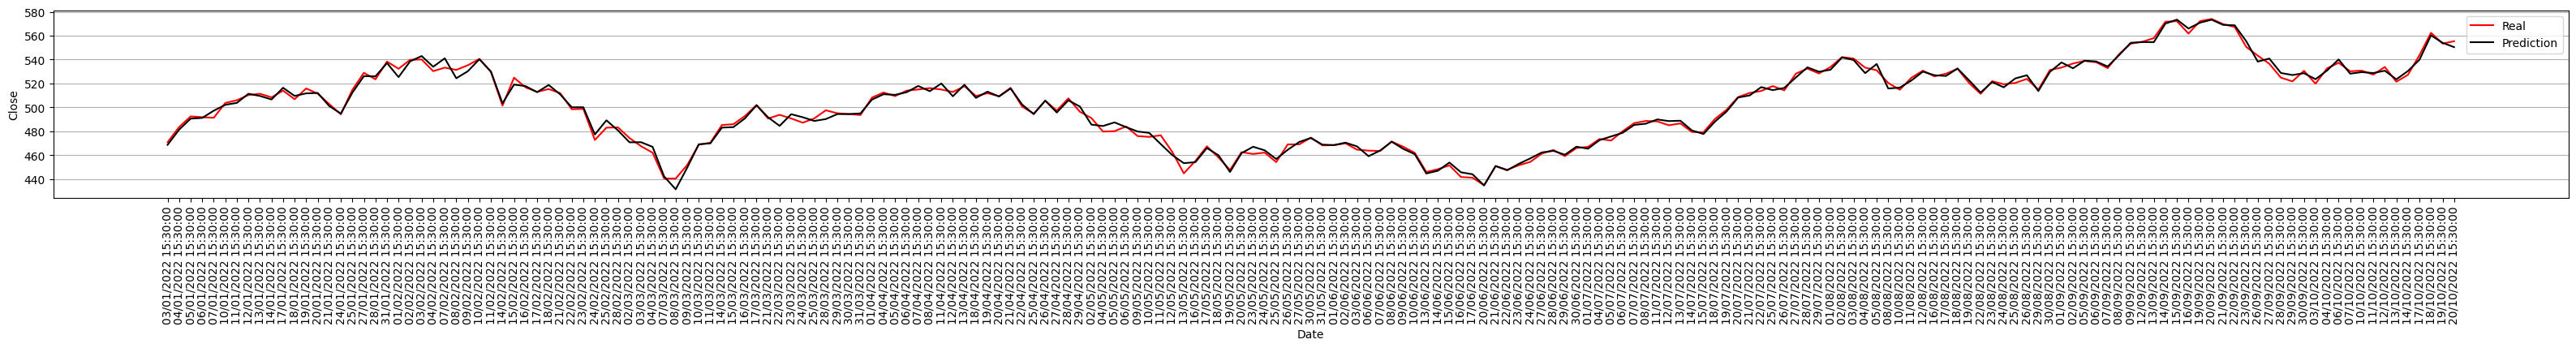

In [17]:
# Graph from YTD
from matplotlib import pyplot as plt

plt.plot(train_df['Date'],close,color = 'red')
plt.plot(train_df['Date'],predicts,color = 'black')
plt.ylabel('Close')
plt.xlabel('Date')
plt.legend(['Real','Prediction'])
plt.rcParams["figure.figsize"] = (40,3)
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

In [67]:
pred_url = "https://raw.githubusercontent.com/k-lakshmikanth/Machine_Learning_Models/main/SBIN/Data/Predict_data.csv"

pred = pd.read_csv(pred_url).to_dict()

for i in pred.keys():
    pred[i] = pred[i][0]
pred

{'date': '2022-10-21',
 'Name': 'State Bank of India',
 'open': 557.25,
 'high': 565.8,
 'low': 557.25,
 'volume': 11767639}

In [68]:
import numpy as np

a= np.array([[(np.array(pred['date']+'T15:30:00.000000000').astype('datetime64')).astype('float64'),pred['open'],pred['high'],pred['low'],pred['volume']]])

In [69]:
a

array([[1.6663662e+18, 5.5725000e+02, 5.6580000e+02, 5.5725000e+02,
        1.1767639e+07]])

In [70]:
# predicted close on date 2022-10-21 03:30pm
reg.predict(a)

array([[559.72410863]])

In [52]:
# actual close on date 2022-10-21 03:30pm as per source(Google)
561.65

561.65